# Exploring Clustering Techniques with Machine Learning

In contrast to _supervised_ machine learning, _unsupervised_ learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is _clustering_, which is similar conceptually to _classification_, except that the the training data does not include known values for the class label to be predicted. **Clustering works by separating the training cases based on similarities** that can be determined from their feature values. Think of it this way; **the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space**. What a clustering model seeks to do is to identify groups, or _clusters_, of entities that are close to one another while being separated from other clusters.


## Topics

**Explore unsupervised clustering** using a seeds dataset.

**Visualize high-dimensional data** with Principal Component Analysis (PCA).

**Determine optimal cluster count** using the "elbow" method.

**Implement K-Means and Agglomerative Clustering** to group seed samples.

**Compare clusters** against actual species labels to evaluate performance.


## Load Data

In [4]:
import pandas as pd

# Load the training dataset
data = pd.read_csv('./../../data/seeds.csv')

# Display random sample of 10 observations
features = data.sample(10)
features

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
73,19.11,16.26,0.9081,6.154,3.930,2.936,6.079,1
49,14.86,14.67,0.8676,5.678,3.258,2.129,5.351,0
100,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
28,14.11,14.18,0.8820,5.541,3.221,2.754,5.038,0
89,20.88,17.05,0.9031,6.450,4.032,5.016,6.321,1
116,18.96,16.20,0.9077,6.051,3.897,4.334,5.750,1
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,0
113,19.14,16.61,0.8722,6.259,3.737,6.682,6.053,1
12,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,0


# Reduce Dimensionality with PLC

As you can see, the dataset contains six data points (or _features_) for each instance (_observation_) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called _Principal Component Analysis_ (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [11]:
# Project 6D data into 2D for visualization

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so that they're on the same scale

scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
print(scaled_features[0:10])

[[0.79631761 0.79480519 1.         0.77456207 0.90294957 0.26864506]
 [0.30724971 0.38181818 0.         0.41203351 0.26355852 0.11108942]
 [0.48561565 0.53246753 0.4691358  0.4424981  0.51760228 0.51874268]
 [0.         0.         0.26419753 0.         0.         0.40433424]
 [0.22094361 0.25454545 0.35555556 0.30769231 0.22835395 0.23311207]
 [1.         1.         0.87654321 1.         1.         0.67473643]
 [0.77905639 0.77922078 0.99012346 0.69611577 0.8715509  0.54158532]
 [0.18527043 0.21818182 0.29135802 0.18202589 0.16555661 0.        ]
 [0.79976985 0.88571429 0.11358025 0.85453161 0.71931494 1.        ]
 [0.19562716 0.21298701 0.5037037  0.23000762 0.2074215  0.47364311]]


In [12]:
# Get the two principle components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

features_2d[0:10]

array([[ 0.73411958,  0.41489795],
       [-0.50996429, -0.18907403],
       [ 0.02717431, -0.06135086],
       [-0.97277773, -0.01623214],
       [-0.52339073,  0.06547864],
       [ 1.11950563,  0.01748559],
       [ 0.73131124,  0.26971911],
       [-0.71661218,  0.16696646],
       [ 0.60253649, -0.73696996],
       [-0.49190233,  0.06907924]])

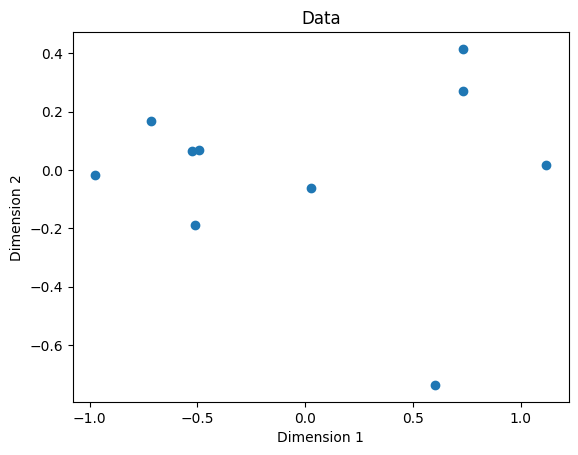

In [16]:
# Visualize features 2d
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:, 0], features_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()


## **3. Determine Optimal Clusters with the Elbow Method**

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the _within cluster sum of squares_ (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.


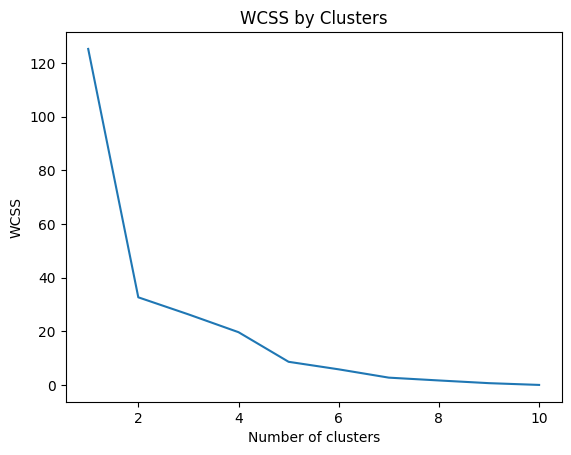

In [17]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  

The plot shows a large reduction in WCSS (so greater _tightness_) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.


## **4. Apply K-Means Clustering**

The algorithm we used to create our test clusters is _K-Means_. This is a commonly used clustering algorithm that separates a dataset into _K_ clusters of equal variance. The number of clusters, _K_, is user defined. The basic algorithm has the following steps:

A set of K centroids are randomly chosen.

Clusters are formed by assigning the data points to their closest centroid.

The means of each cluster is computed and the centroid is moved to the mean.

Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when each new iteration results in negligable movement of centroids and the clusters become static.

When the clusters stop changing, the algorithm has _converged_, defining the locations of the clusters - note that the random starting point for the centroids means that re-running the algorithm could result in slightly different clusters, so training usually involves multiple iterations, reinitializing the centroids each time, and the model with the best WCSS is selected.

Let's try using K-Means on our seeds data with a K value of 3.


In [19]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=100)

# fit the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)

# View cluster assignments
km_clusters


array([2, 0, 2, 0, 0, 1, 2, 0, 1, 0], dtype=int32)